In [2]:
# Illustrate basic properties of Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf 

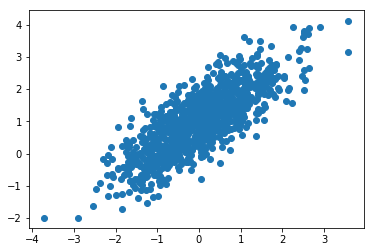

In [3]:
mean = [0, 1, 0.3]
cov = [[1.0, 0.8, 0.2],
       [0.8, 1.0, 0.2],
       [0.2, 0.2, 1.0]]
x1, x2, x3 = np.random.multivariate_normal(mean, cov, 1000).T
plt.scatter(x1, x2)

In [4]:
y = 1.5 + 2*x1 + 3 * x2 + np.random.normal(size=1000)
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
res1 = smf.ols('y ~ x1 + x2', data = df).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.147e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:03:40   Log-Likelihood:                -1404.5
No. Observations:                1000   AIC:                             2815.
Df Residuals:                     997   BIC:                             2830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4607      0.061     23.797      0.000       1.340       1.581
x1             2.0285      0.053     38.417      0.000       1.925       2.132
x2             2.9865      0.053     56.611      0.000       2.883       3.090
==============================================================================
Omnibus:                        1.839   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.730
Skew:                           0.061   Prob(JB):                        0.421
Kurtosis:                       3.164   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
res2 = smf.ols('y ~ x1 + x2 +x1*x2', data = df).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     7640.
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:05:10   Log-Likelihood:                -1404.4
No. Observations:                1000   AIC:                             2817.
Df Residuals:                     996   BIC:                             2836.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4668      0.065     22.665      0.000       1.340       1.594
x1             2.0369      0.060     34.015      0.000       1.919       2.154
x2             2.9861      0.053     56.562      0.000       2.883       3.090
x1:x2         -0.0072      0.024     -0.297      0.767      -0.055       0.041
==============================================================================
Omnibus:                        1.778   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.668
Skew:                           0.059   Prob(JB):                        0.434
Kurtosis:                       3.162   Cond. No.                         7.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compare between res1 and res2 (with a dubious interaction between x1 and x2):
- Similar R2 around 95% <br>
- Similar Log Likelihood, AIC, BIC value <br>

But P-value corresponding to x1:x2 is very large, so it may be reasonable not to use this value.


In [8]:
# Expected Value of Residuals = 0
print(np.isclose(np.mean(res1.resid), 0))

True


In [10]:
print("Covariance between Residuals and x1 are 0")
np.cov(res1.resid, df.x1))

array([[  9.72459986e-01,  -2.10508954e-15],
       [ -2.10508954e-15,   9.82236908e-01]])

In [12]:
print("Covariance between Residuals and x2 are 0")
np.cov(res1.resid, df.x2)

Covariance between Residuals and x2 are 0


array([[  9.72459986e-01,  -2.64319764e-15],
       [ -2.64319764e-15,   9.83961778e-01]])

In [13]:
y = 1.5 + 2*x1 + 3 * x2 + 4*x3
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
res3 = smf.ols('y ~ x1 + x2', data = df).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     955.5
Date:                Thu, 24 May 2018   Prob (F-statistic):          1.76e-232
Time:                        16:19:22   Log-Likelihood:                -2815.7
No. Observations:                1000   AIC:                             5637.
Df Residuals:                     997   BIC:                             5652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2260      0.252      8.843      0.000       1.732       2.720
x1             2.3526      0.217     10.865      0.000       1.928       2.778
x2             3.5813      0.216     16.553      0.000       3.157       4.006
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.230
Skew:                           0.027   Prob(JB):                        0.891
Kurtosis:                       2.950   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have induced correlation between the error term and the independent variables, but the observations still hold. Linear Regression estimators always follow these relationships between the residuals (not the errors) and the independent variables.

In [17]:
print(np.isclose(np.mean(res3.resid),0))
print(np.cov(res3.resid, df.x1))
print(np.cov(res3.resid, df.x2))

True
[[  1.63545916e+01  -2.65297738e-15]
 [ -2.65297738e-15   9.82236908e-01]]
[[  1.63545916e+01  -3.31799986e-15]
 [ -3.31799986e-15   9.83961778e-01]]


According to Wikipedia and to my memory, the 4 assumptions of Linear Regression that ensure the estimators are unbiased are:
- Correctly specify the model, ie: linear relationship is correct
- The error terms are iid ( no time series here)
- No multicollinearity (so that the inverse of covariance matrix exists)
- Homoskedasticity

Notice that there are no assumption that X are normally distributed. The assumption that the error is normally distributed only helps with hypothesis testing, not with the unbiasedness of the estimator.

It's a little difficult to see homosekdasticity in the example above. Let's try something else.

In [43]:
bins = []
for i in range(4):
    bins.append(np.percentile(x1, i*25))
print(bins)

[-3.7060339091115666, -0.65870312734438596, 0.04264479316605771, 0.6392437227894805]


In [44]:
inds = np.digitize(x1, bins)

In [50]:
error = inds * np.random.normal(size=1000)
y = 1.5 + 2*x1 + 3 * x2 + error
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
res4 = smf.ols('y ~ x1 + x2', data = df).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1373.
Date:                Thu, 24 May 2018   Prob (F-statistic):          3.84e-287
Time:                        17:18:50   Log-Likelihood:                -2445.1
No. Observations:                1000   AIC:                             4896.
Df Residuals:                     997   BIC:                             4911.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4822      0.174      8.530      0.000       1.141       1.823
x1             1.9235      0.149     12.868      0.000       1.630       2.217
x2             2.9858      0.149     19.993      0.000       2.693       3.279
==============================================================================
Omnibus:                       28.291   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.323
Skew:                           0.044   Prob(JB):                     1.08e-14
Kurtosis:                       4.239   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see some level of hetero-skedasticity here, but the residuals still have 0 correlation with x1 and x2

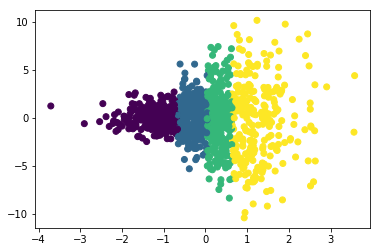

In [61]:
plt.scatter(x1, error, c = inds)

In [52]:
print(np.isclose(np.mean(res4.resid),0))
print(np.cov(res4.resid, df.x1))
print(np.cov(res4.resid, df.x2))

True
[[  7.79319958e+00  -5.18326345e-16]
 [ -5.18326345e-16   9.82236908e-01]]
[[  7.79319958e+00  -5.17437278e-16]
 [ -5.17437278e-16   9.83961778e-01]]


In [54]:
np.cov(error, df.x1)

array([[ 7.80086512, -0.08636992],
       [-0.08636992,  0.98223691]])

If we look at the graph, we can see that the covariance above does not tell us much about the relationship between the error term and x1. <br>
Coefficients are still statistically significant, but we have lower R-squared and hetero-skedasticity. The heteroskedasticity can be recognized by looking at the residuals.

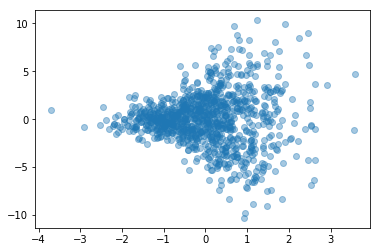

In [66]:
plt.scatter(df.x1, res4.resid, alpha = 0.4)

The residuals are definitely related to y.

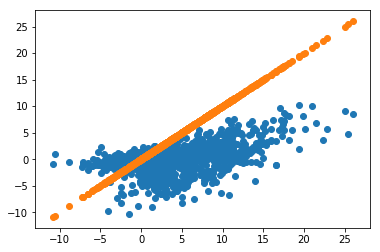

In [57]:
plt.scatter(y, res4.resid)
plt.scatter(y, y)